In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis.dihedrals import Dihedral, Ramachandran
import matplotlib.pyplot as plt
from math import floor
residues = [20, 40, 60, 80, 100, 120, 140]
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("ticks", {"xtick.direction": "in","ytick.direction": "in", "xtick.major.size": 8, "ytick.major.size": 8, 'font.family': ['Liberation Sans']})

In [2]:
import numpy as np

In [3]:
sim='ref'
Nbins = 24
step=10#int(floor(len(u.trajectory)/1000))


PDB = "/data/nsalvi/NT_HPS/test_4BR/ref_20210817/1/CG.pdb"
XTC = "/data/nsalvi/NT_HPS/test_4BR/ref_20210817/all.dcd"


u = mda.Universe(PDB, XTC)

r = u.select_atoms("protein")
R = Ramachandran(r).run(step=step)

phi = R.angles[:, :, 0].flatten()
psi = R.angles[:, :, 1].flatten()

delta = int(360/Nbins)
bin_i = [n for n in range(-180, 179, delta)]

indsphi = np.digitize(phi, bin_i)
Npoints = len(psi)

all_values = []
                    
for bcounter, bi in enumerate(bin_i): #loop over psi, calculate values
    selpsi = [el for acounter, el in enumerate(psi) if indsphi[acounter]==bcounter+1]
    indspsi = np.digitize(selpsi, bin_i)
    unique, counts = np.unique(indspsi, return_counts=True)
    counts = dict(zip(unique, counts))
    pop = [counts[acounter+1]/Npoints if (acounter+1) in counts.keys() else 0 #1e-4#1e-12 
                                     for acounter, el in enumerate(bin_i)]
    all_values.append(pop)

all_values = np.array(all_values)    
all_values = all_values/sum(sum(all_values))

/home/nsalvi/anaconda3/envs/py36/lib/python3.6/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: 
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))
/home/nsalvi/anaconda3/envs/py36/lib/python3.6/site-packages/MDAnalysis/topology/PDBParser.py:330: UserWarning: Element information is absent or missing for a few atoms. Elements attributes will not be populated.
  warnings.warn("Element information is absent or missing for a few "
/home/nsalvi/anaconda3/envs/py36/lib/python3.6/site-packages/MDAnalysis/analysis/dihedrals.py:324: UserWarning: Cannot determine phi and psi angles for the first or last residues
  warnings.warn("Cannot determine phi and psi angles for the first "


In [4]:
np.savetxt("all-rama-ref.out", all_values)

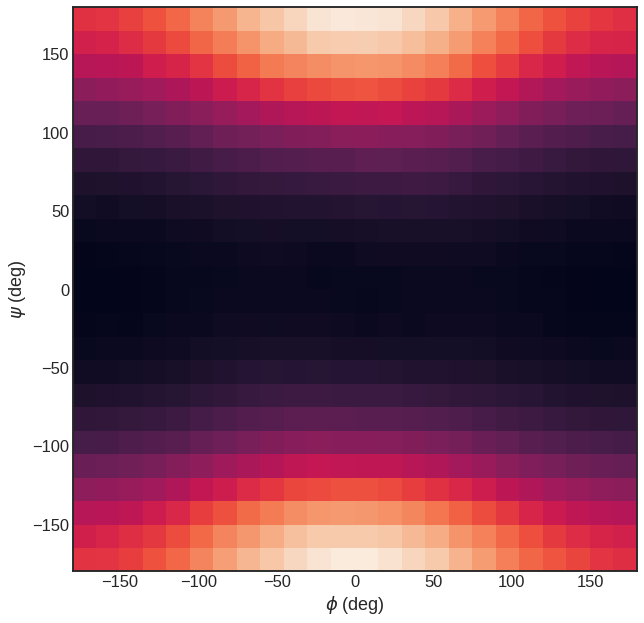

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(20,9))

ax.set_aspect('equal')
r = u.select_atoms("protein")
R = Ramachandran(r).run(step=step)

x = phi
y = psi

rp = ax.hist2d(x, y, bins=(Nbins, Nbins), range=[[-180,180], [-180,180]])
ax.set_xlabel('$\phi$ (deg)')
ax.set_ylabel('$\psi$ (deg)')
ax.set_xlim([-180,180])
ax.set_ylim([-180,180])
ax.set_aspect('equal')

plt.tight_layout()
plt.savefig("all-rama-ref-20210817.pdf", dpi=300)